In [52]:
import os
import tensorflow as tf
print(tf.__version__)


2.10.1


In [53]:
import tensorflow as tf
import GPUtil

# I am checking the TensorFlow with GPU information, since I am using two differente conda evn to run 2 tasks
print("TensorFlow version:", tf.__version__)
gpus = tf.config.list_physical_devices('GPU')
print(f"Number of GPUs Available: {len(gpus)}")

if gpus:
    print("\nGPU Details (from TensorFlow):")
    for i, gpu in enumerate(gpus):
        print(f" [{i}] Name: {gpu.name} | Type: {gpu.device_type}")

    print("\nGPU Details (from GPUtil):")
    for i, gpu in enumerate(GPUtil.getGPUs()):
        print(f" [{i}] ID: {gpu.id} | Name: {gpu.name} | Load: {gpu.load*100:.1f}% | Memory Free: {gpu.memoryFree} MB")
else:
    print("No GPU detected. Running on CPU.")

TensorFlow version: 2.10.1
Number of GPUs Available: 1

GPU Details (from TensorFlow):
 [0] Name: /physical_device:GPU:0 | Type: GPU

GPU Details (from GPUtil):
 [0] ID: 0 | Name: NVIDIA GeForce RTX 4070 SUPER | Load: 26.0% | Memory Free: 412.0 MB


In [ ]:
import os
import cv2
import math
import shutil
import random
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers, models, applications, preprocessing, optimizers, callbacks, regularizers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam, RMSprop, Adadelta
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import models, layers, optimizers, callbacks
from tensorflow.keras.initializers import glorot_uniform, he_normal
from tensorflow.keras.utils import plot_model, model_to_dot
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, AveragePooling2D, Input, Dense, Lambda, Flatten, Dropout, BatchNormalization, Activation, ZeroPadding2D, Add
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau

import zipfile
from zipfile import ZipFile
from IPython import display
from IPython.display import HTML, display, clear_output, SVG, set_matplotlib_formats, Image
set_matplotlib_formats('svg')
!pip install visualkeras
import visualkeras

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score, f1_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.utils.class_weight import compute_class_weight

import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [55]:
# import os
# import shutil
# import random
# from collections import defaultdict

# def split_brake_dataset(source_dir, dest_dir, split_ratio=(0.7, 0.15, 0.15), seed=42):
#     random.seed(seed)
#     assert sum(split_ratio) == 1.0

#     stats = defaultdict(lambda: defaultdict(int)) 

#     for class_name in os.listdir(source_dir):
#         class_path = os.path.join(source_dir, class_name)
#         if not os.path.isdir(class_path):
#             continue

#         images = os.listdir(class_path)
#         random.shuffle(images)

#         total = len(images)
#         train_end = int(total * split_ratio[0])
#         val_end = train_end + int(total * split_ratio[1])

#         splits = {
#             "train": images[:train_end],
#             "val": images[train_end:val_end],
#             "test": images[val_end:]
#         }

#         for split_name, split_images in splits.items():
#             split_class_dir = os.path.join(dest_dir, split_name, class_name)
#             os.makedirs(split_class_dir, exist_ok=True)
#             for img in split_images:
#                 shutil.copy(os.path.join(class_path, img), os.path.join(split_class_dir, img))
#                 stats[split_name][class_name] += 1


#     print("\n Summary of the Splitting Process:")
#     for split in ["train", "val", "test"]:
#         print(f"\n{split.upper()}:")
#         total = 0
#         for class_name in stats[split]:
#             count = stats[split][class_name]
#             print(f"  {class_name}: {count} ảnh")
#             total += count
#         print(f" Total: {total} images")

# source_brake = "C:/Users/tonyh_yxuq8za/Desktop/TONY_AI/Tail_Light_Detection/Data_Brake"
# dest_brake_split = "C:/Users/tonyh_yxuq8za/Desktop/TONY_AI/Tail_Light_Detection/Data_Brake_Split"
# split_brake_dataset(source_brake, dest_brake_split)


In [56]:
# import os
# import shutil
# import random
# from collections import defaultdict

# def split_indicator_dataset(source_dir, dest_dir, split_ratio=(0.7, 0.15, 0.15), seed=42):
#     random.seed(seed)
#     assert sum(split_ratio) == 1.0

#     stats = defaultdict(lambda: defaultdict(int))  

#     for class_name in os.listdir(source_dir):
#         class_path = os.path.join(source_dir, class_name)
#         if not os.path.isdir(class_path):
#             continue

#         images = os.listdir(class_path)
#         random.shuffle(images)

#         total = len(images)
#         train_end = int(total * split_ratio[0])
#         val_end = train_end + int(total * split_ratio[1])

#         splits = {
#             "train": images[:train_end],
#             "val": images[train_end:val_end],
#             "test": images[val_end:]
#         }

#         for split_name, split_images in splits.items():
#             split_class_dir = os.path.join(dest_dir, split_name, class_name)
#             os.makedirs(split_class_dir, exist_ok=True)
#             for img in split_images:
#                 shutil.copy(os.path.join(class_path, img), os.path.join(split_class_dir, img))
#                 stats[split_name][class_name] += 1

#     print("\n Summary of the Splitting Process:")
#     for split in ["train", "val", "test"]:
#         print(f"\n{split.upper()}:")
#         total = 0
#         for class_name in stats[split]:
#             count = stats[split][class_name]
#             print(f"  {class_name}: {count} images")
#             total += count
#         print(f" Total: {total} images")

# source_indicator = "C:/Users/tonyh_yxuq8za/Desktop/TONY_AI/Tail_Light_Detection/Data_Indicator"
# dest_indicator_split = "C:/Users/tonyh_yxuq8za/Desktop/TONY_AI/Tail_Light_Detection/Data_Indicator_Split"

# split_indicator_dataset(source_indicator, dest_indicator_split)


In [57]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import preprocess_input

IMG_SIZE = (64, 64)
BATCH_SIZE = 32
SPLIT_DATA = "C:/Users/tonyh_yxuq8za/Desktop/TONY_AI/Tail_Light_Detection/Data_Split_Indicators2/Data_Split_Indicators/Data_Split_Indicators"


In [58]:
train_gen = ImageDataGenerator(
    rescale=1./255
).flow_from_directory(
    os.path.join(SPLIT_DATA, "train"),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

val_gen = ImageDataGenerator(
    rescale=1./255
).flow_from_directory(
    os.path.join(SPLIT_DATA, "val"),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

test_gen = ImageDataGenerator(
    rescale=1./255
).flow_from_directory(
    os.path.join(SPLIT_DATA, "test"),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)


Found 11626 images belonging to 3 classes.
Found 2733 images belonging to 3 classes.
Found 2738 images belonging to 3 classes.


In [59]:
NUM_CLASSES = len(train_gen.class_indices)
print("Class indices:", train_gen.class_indices)
print("Number of classes:", NUM_CLASSES)
print("Number of training samples:", train_gen.samples)
print("Number of validation samples:", val_gen.samples)
print("Number of test samples:", test_gen.samples)

Class indices: {'indicator_left': 0, 'indicator_off': 1, 'indicator_right': 2}
Number of classes: 3
Number of training samples: 11626
Number of validation samples: 2733
Number of test samples: 2738


In [60]:
y_train = train_gen.classes
cw = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight = dict(enumerate(cw))
print("Class weights:", class_weight)


Class weights: {0: 1.0279398762157383, 1: 0.8720372037203721, 2: 1.1357952325127003}


In [61]:
CHECKPOINTING_DIR = "C:/Users/tonyh_yxuq8za/Desktop/TONY_AI/INDICATORS_CHECK_MAIN_5"
os.makedirs(CHECKPOINTING_DIR, exist_ok = True)

In [62]:
CHECKPOINTING_PATH = os.path.join(
    CHECKPOINTING_DIR,
    "best_model_indicators_main_5.keras"
)

In [63]:
checkpointing_cb = ModelCheckpoint(
    filepath = CHECKPOINTING_PATH,
    monitor = "val_loss",
    verbose = 1,
    save_best_only = True,
    save_weights_only = False,
    mode = "min",
    save_freq = "epoch"
)

In [64]:
model = models.Sequential([
    layers.Input(shape=(64, 64, 3)),
    
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),
    layers.Dropout(0.4),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [65]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 batch_normalization_6 (Batc  (None, 62, 62, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 batch_normalization_7 (Batc  (None, 29, 29, 64)       256       
 hNormalization)                                                 
                                                      

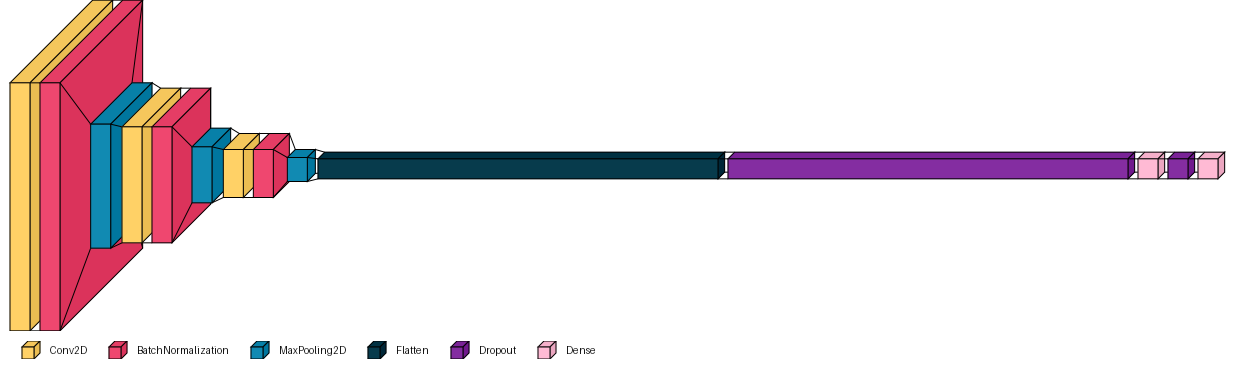

In [66]:
visualkeras.layered_view(model, legend = True, draw_volume = True)

In [67]:
reduce_lr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6,
    verbose=1,
    mode = 'min'
)

earlystop_cb = EarlyStopping(
    monitor='val_loss',
    patience= 10,
    restore_best_weights=True,
    verbose=1,
    mode = 'min'
)

In [68]:
history = model.fit(
    train_gen,
    epochs=100, 
    validation_data=val_gen,
    class_weight=class_weight,
    callbacks=[checkpointing_cb, reduce_lr_cb, earlystop_cb],
    verbose=1
)

Epoch 1/100
362/364 [============================>.] - ETA: 0s - loss: 0.8151 - accuracy: 0.6629
Epoch 1: val_loss improved from inf to 1.27335, saving model to C:/Users/tonyh_yxuq8za/Desktop/TONY_AI/INDICATORS_CHECK_MAIN_5\best_model_indicators_main_5.keras
364/364 [==============================] - 5s 12ms/step - loss: 0.8131 - accuracy: 0.6635 - val_loss: 1.2733 - val_accuracy: 0.4830 - lr: 0.0010
Epoch 2/100
360/364 [============================>.] - ETA: 0s - loss: 0.4978 - accuracy: 0.8022
Epoch 2: val_loss improved from 1.27335 to 0.49922, saving model to C:/Users/tonyh_yxuq8za/Desktop/TONY_AI/INDICATORS_CHECK_MAIN_5\best_model_indicators_main_5.keras
364/364 [==============================] - 4s 12ms/step - loss: 0.4985 - accuracy: 0.8020 - val_loss: 0.4992 - val_accuracy: 0.8024 - lr: 0.0010
Epoch 3/100
359/364 [============================>.] - ETA: 0s - loss: 0.3818 - accuracy: 0.8537
Epoch 3: val_loss improved from 0.49922 to 0.43102, saving model to C:/Users/tonyh_yxuq8za/

In [69]:
test_loss, test_accuracy = model.evaluate(test_gen, steps = len(test_gen), verbose = 1)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

train_loss, train_accuracy = model.evaluate(train_gen, steps = len(train_gen), verbose = 1)
print(f"Train Loss: {train_loss}")
print(f"Train Accuracy: {train_accuracy}")

86/86 [==============================] - 1s 10ms/step - loss: 0.2932 - accuracy: 0.9204
Test Loss: 0.29315829277038574
Test Accuracy: 0.9203798174858093
364/364 [==============================] - 3s 9ms/step - loss: 0.0238 - accuracy: 0.9927
Train Loss: 0.02377692423760891
Train Accuracy: 0.992688775062561


In [70]:
val_loss, val_accuracy = model.evaluate(val_gen, steps = len(val_gen), verbose = 1)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

86/86 [==============================] - 1s 9ms/step - loss: 0.2815 - accuracy: 0.9243
Validation Loss: 0.281534880399704
Validation Accuracy: 0.9242590665817261


In [80]:
y_test = test_gen.classes

In [82]:
y_preds =  model.predict(test_gen, steps = len(test_gen))
y_preds_model = np.argmax(y_preds, axis = 1)

86/86 [==============================] - 29s 338ms/step


In [79]:
accuracy_score_baseline_model = accuracy_score(y_test, y_preds_model)
print(f"Accuracy Score: {accuracy_score_baseline_model}")
precision_score_baseline_model = precision_score(y_test, y_preds_model, average = "macro")
print(f"Precision Score: {precision_score_baseline_model}")
recall_score_baseline_model = recall_score(y_test, y_preds_model, average = "macro")
print(f"Recall Score: {recall_score_baseline_model}")
f1_score_baseline_model = f1_score(y_test, y_preds_model, average = "macro")
print(f"F1 Score: {f1_score_baseline_model}")

Accuracy Score: 0.9203798392987582
Precision Score: 0.9186710982412695
Recall Score: 0.9196938810738152
F1 Score: 0.9189548923546208


86/86 [==============================] - 1s 9ms/step
Classification Report:
                 precision    recall  f1-score   support

 indicator_left       0.93      0.89      0.91       982
  indicator_off       0.94      0.97      0.95       954
indicator_right       0.89      0.90      0.90       802

       accuracy                           0.92      2738
      macro avg       0.92      0.92      0.92      2738
   weighted avg       0.92      0.92      0.92      2738



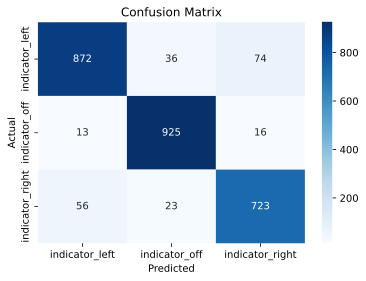

In [71]:
y_pred_probs = model.predict(test_gen)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = test_gen.classes
class_names = list(train_gen.class_indices.keys()) 
cm = confusion_matrix(y_true, y_pred)

# I am creating the classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# I am plotting the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


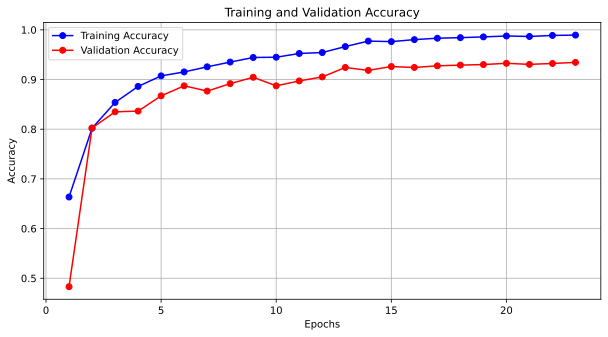

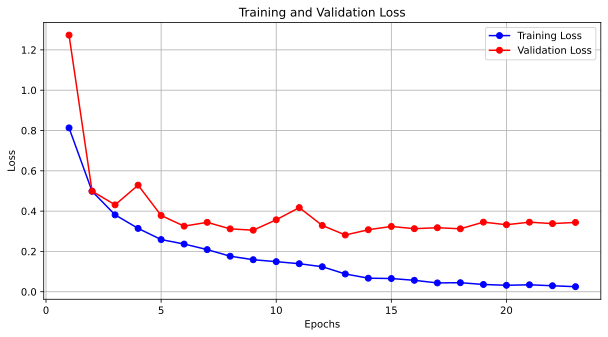

In [72]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)


plt.figure(figsize=(10, 5))
plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()